In [29]:

import os
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd

from shapely.geometry import box  # To create polygon bounding box

pd.set_option("display.max.columns", None)

# -------------------------------------
# Import and simplify states polygons
states = gpd.read_file(os.path.join('data',
                                    'tl_2022_us_state',
                                    'tl_2022_us_state.shp')
                                    )

# Import Natural Earth populated places points
places = gpd.read_file(os.path.join('data',
                                    'ne_50m_populated_places_simple',
                                    'ne_50m_populated_places_simple.shp')
                                    )

# Import ferry routes lines
roads = gpd.read_file(os.path.join('data',
                                   'ne_10m_roads',
                                   'ne_10m_roads.shp')
                                   )

In [30]:
df_list = [states, places, roads]

# Check in

In [ ]:
for i in df_list:
    i.columns = [c.lower() for c in i.columns]

In [32]:
states.head()

,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."
3,2,4,27,00662849,27,MN,Minnesota,00,G4000,A,206244837557,18937184315,+46.3159573,-094.1996043,"POLYGON ((-95.31989 48.99892, -95.31747 48.998..."
4,3,5,24,01714934,24,MD,Maryland,00,G4000,A,25151771744,6979295311,+38.9466584,-076.6744939,"POLYGON ((-75.75600 39.24607, -75.75579 39.243..."


In [33]:
print(f"CRS: {states.crs}")
states.head(3)

CRS: EPSG:4269


,region,division,statefp,statens,geoid,stusps,name,lsad,mtfcc,funcstat,aland,awater,intptlat,intptlon,geometry
0,3,5,54,01779805,54,WV,West Virginia,00,G4000,A,62266456923,489045863,+38.6472854,-080.6183274,"POLYGON ((-77.75438 39.33346, -77.75422 39.333..."
1,3,5,12,00294478,12,FL,Florida,00,G4000,A,138962819934,45971472526,+28.3989775,-082.5143005,"MULTIPOLYGON (((-83.10874 24.62949, -83.10711 ..."
2,2,3,17,01779784,17,IL,Illinois,00,G4000,A,143778515726,6216539665,+40.1028754,-089.1526108,"POLYGON ((-87.89243 38.28285, -87.89334 38.282..."


<Axes: >

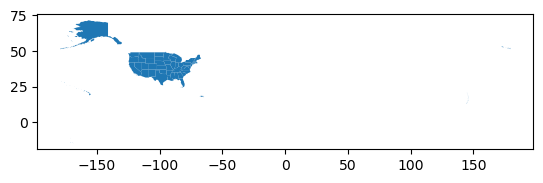

In [34]:
states.plot()

We are interested in Alaska only

<Axes: >

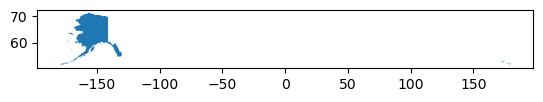

In [35]:
alaska = states[states.name == 'Alaska']
alaska.plot()

In [39]:
# Reproject to CRS optimized for Alaska
alaska = alaska.to_crs('epsg:3338')

# Inspect the new CRS

print('Is this CRS projected? ', alaska.crs.is_projected)
alaska.crs

Is this CRS projected?  True


<Projected CRS: EPSG:3338>
Name: NAD83 / Alaska Albers
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Alaska.
- bounds: (172.42, 51.3, -129.99, 71.4)
Coordinate Operation:
- name: Alaska Albers (meter)
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

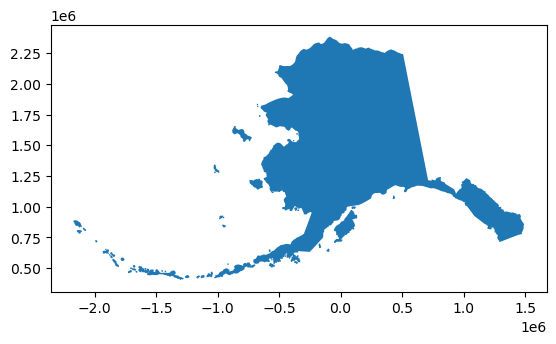

In [40]:
alaska.plot()

# Prepare populated places points

In [41]:
print(f"CRS: {places.crs}")
places.head(3)

CRS: EPSG:4326


,scalerank,natscale,labelrank,featurecla,name,namepar,namealt,nameascii,adm0cap,capalt,capin,worldcity,megacity,sov0name,sov_a3,adm0name,adm0_a3,adm1name,iso_a2,note,latitude,longitude,pop_max,pop_min,pop_other,rank_max,rank_min,meganame,ls_name,min_zoom,ne_id,geometry
0,10,1,5,Admin-1 region capital,Bombo,None,None,Bombo,0,0,None,0,0,Uganda,UGA,Uganda,UGA,Bamunanika,UG,None,0.583299,32.533300,75000,21000,0.0,8,7,None,None,7.0,1159113923,POINT (32.53330 0.58330)
1,10,1,5,Admin-1 region capital,Fort Portal,None,None,Fort Portal,0,0,None,0,0,Uganda,UGA,Uganda,UGA,Kabarole,UG,None,0.671004,30.275002,42670,42670,0.0,7,7,None,None,7.0,1159113959,POINT (30.27500 0.67100)
2,10,1,3,Admin-1 region capital,Potenza,None,None,Potenza,0,0,None,0,0,Italy,ITA,Italy,ITA,Basilicata,IT,None,40.642002,15.798997,69060,69060,0.0,8,8,None,None,7.0,1159117259,POINT (15.79900 40.64200)


<Axes: >

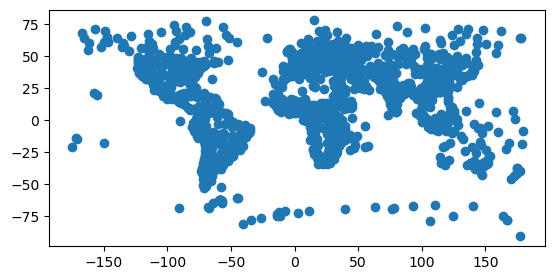

In [42]:
places.plot()

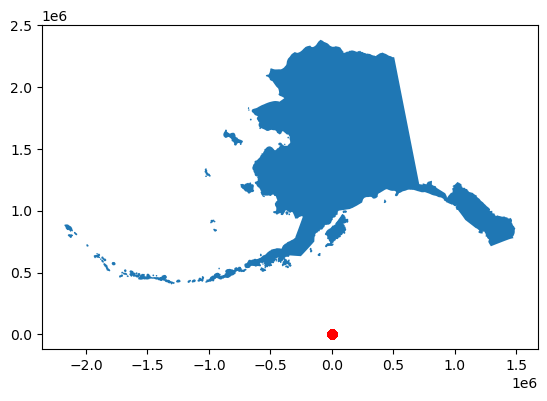

In [ ]:
# Trouble because the places CRS is worldwide and not for Alaska

fig, ax = plt.subplots()

alaska.plot(ax = ax)
places.plot(ax = ax, color = 'red')

plt.show()

In [ ]:
# to plot analyze or integrate different geospatial datasets, them must have matching CRS

In [50]:
alaska.crs == places.crs

True

In [46]:
places = places.to_crs(alaska.crs)

In [ ]:
#Check in the places geodataframe into alaskas crs and verify crs is matching using assert

In [48]:
assert alaska.crs == places.crs

In [15]:
# Change places CRS to Alaska crs

places = places.to_crs('epsg:3338')

In [16]:
alaska.crs == places.crs

True

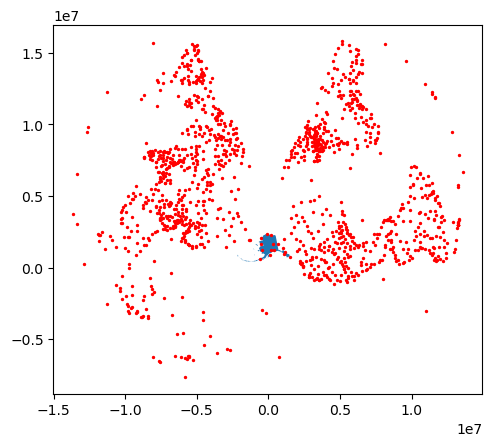

In [51]:

fig, ax = plt.subplots()

alaska.plot(ax = ax)
places.plot(ax = ax, color = 'red', markersize=2)

plt.show()


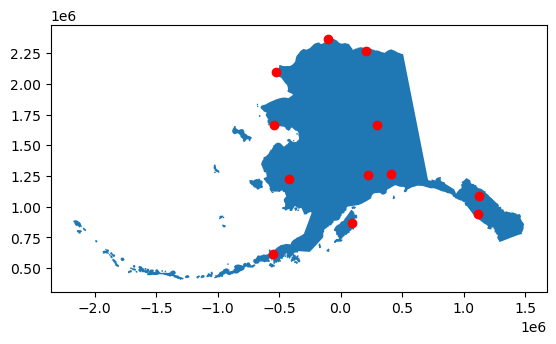

In [54]:
# Using the clipping function

#Clipping means using polygons to select data within

# Syntax:
# updated_geodf = geopandas.clip(geodf, mask)

#Where the intersection of the geometroies in geodf with mask
#mask = gpd.GeoDataframe with the polygons you want to use for clipping

# Make sure the CRS for mask and geodf match 


ak_places = gpd.clip(places, alaska)

fix, ax = plt.subplots()
alaska.plot(ax = ax)
ak_places.plot(ax = ax, color = 'red')
plt.show()

In [ ]:
# ## Prepare the roads

# Examine the roads dataset

In [58]:
print(f'CRS is: {roads.crs}')

roads.head(3)

CRS is: EPSG:4326


,scalerank,featurecla,type,sov_a3,note,edited,name,namealt,namealtt,routeraw,question,length_km,toll,ne_part,label,label2,local,localtype,localalt,labelrank,ignore,add,rwdb_rd_id,orig_fid,prefix,uident,continent,expressway,level,min_zoom,min_label,geometry
0,8,Road,Secondary Highway,CAN,None,"Version 1.5: Changed alignment, a few adds in ...",None,None,None,None,0,3,0,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,314705,North America,0,None,7.1,9.6,"LINESTRING (-133.32533 62.21571, -133.31664 62..."
1,7,Road,Secondary Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",83,None,None,None,0,164,0,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,108105,North America,0,Federal,7.0,8.6,"LINESTRING (-100.50543 42.80753, -100.53495 42..."
2,7,Road,Secondary Highway,USA,None,"Version 1.5: Changed alignment, a few adds in ...",840,None,None,None,0,98,0,ne_1d4_original,None,None,None,None,None,0,0,0,0,0,None,0,North America,0,U/C,7.0,9.5,"LINESTRING (-87.27432 36.02439, -87.22916 35.9..."


<Axes: >

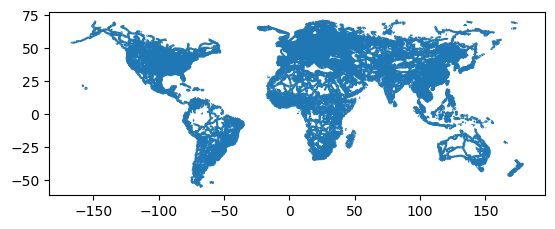

In [59]:
roads.plot()

We will not just subset the dataset to US based.
- Saves memory
- Computer and software runs faster


<Axes: >

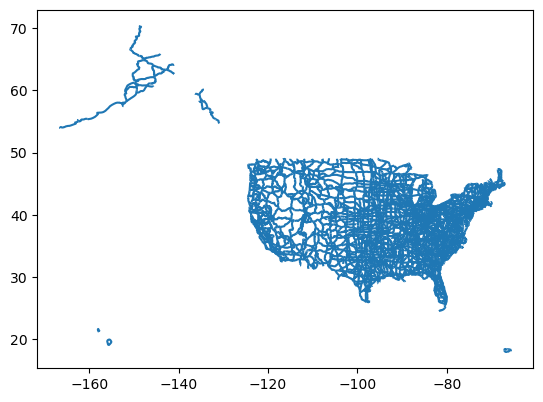

In [60]:
usa_roads = roads[roads.sov_a3 == 'USA']
usa_roads.plot()

In [61]:
# We want to reduce the data to what we need so processes are faster.
#Now we wanto clip only alaska geometry
#Now Alaska roads

ak_roads = gpd.clip(usa_roads.to_crs(alaska.crs), alaska)


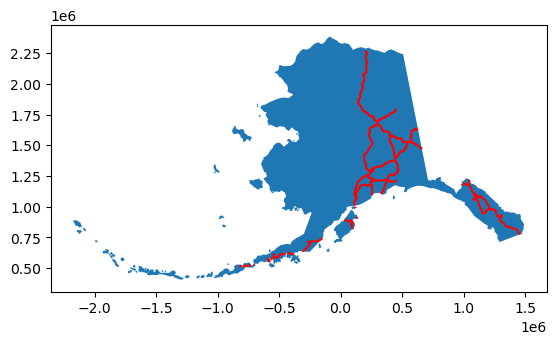

In [62]:
fig, ax = plt.subplots()
alaska.plot(ax = ax)
ak_roads.plot(ax = ax, color = 'red')
plt.show()

## Clipping with a bounding box

We can also use bbox instead for roads
We will clip the usa-roads geo-df with the bounding box of alaska instea of thew poltgons

we wil lcreate the bounding box with the box() functions

`box(minx,miny,maxx,maxy)`

In [63]:
alaska.total_bounds

array([-2175729.73162241,   404545.10791528,  1493082.30904445,
        2383808.43520815])

<class 'shapely.geometry.polygon.Polygon'>


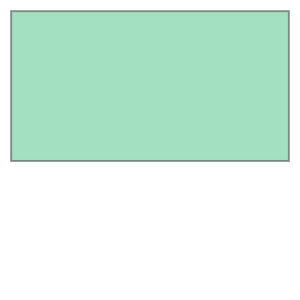

In [ ]:
# xbox(*gdf.total_bounds)

#in our case:
bbox = box(*alaska.total_bounds)
print(type(bbox))
bbox

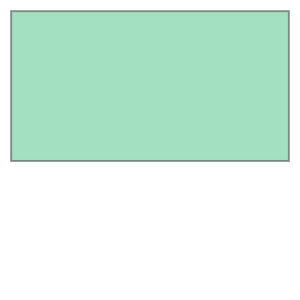

In [65]:
# Or we could use the coords
box(-2175729.73162241,   404545.10791528,  1493082.30904445,
        2383808.43520815)


 `*` = unpacking operator

 Think about it as an unpacking the elements in alaska.total_bounds and assigning them one-by-one to the parameters minx,miny,maxx,maxy of the box() function

In [69]:
list = ['a','b','c']
print(list)
print(*list)


['a', 'b', 'c']
a b c


In [72]:
# Because its just a box, we need to interpret it by wrapping it into a geo-dataframe and assign a crs

ak_bbox = gpd.GeoDataFrame(geometry = [bbox], #assign geometry col
                           crs = alaska.crs) #assign crs
print(type(ak_bbox))
ak_bbox

<class 'geopandas.geodataframe.GeoDataFrame'>


,geometry
0,"POLYGON ((1493082.309 404545.108, 1493082.309 ..."


<Axes: >

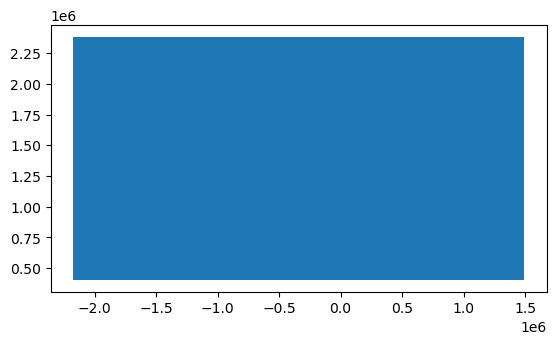

In [73]:
ak_bbox.plot()

In [75]:
#Now we can clip the roads using alaska bounds

ak_complete_roads = gpd.clip(usa_roads.to_crs(ak_bbox.crs), ak_bbox)

Text(0.5, 1.0, 'Roads clipped with AK bounding box')

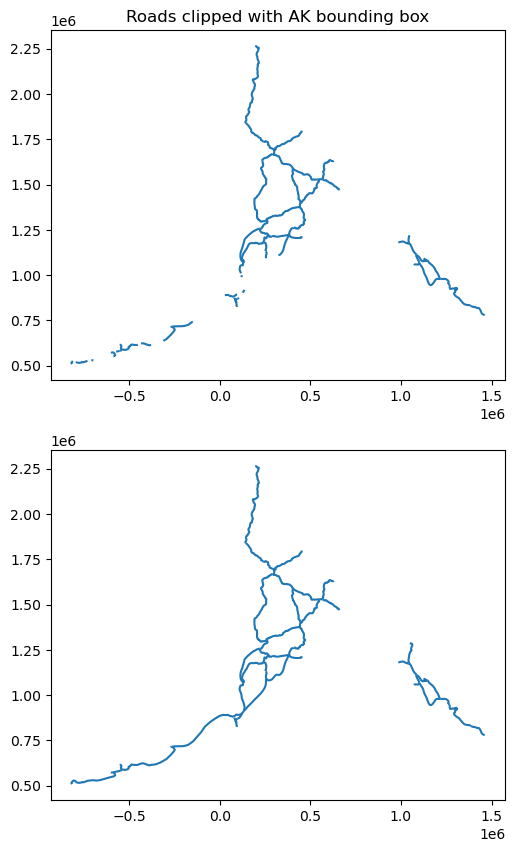

In [76]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize = (10,10))

ak_roads.plot(ax=ax1)
ax1.set_title('Roads clupped with AK multipolygon')

ak_complete_roads.plot(ax = ax2)
ax1.set_title('Roads clipped with AK bounding box')

<Axes: >

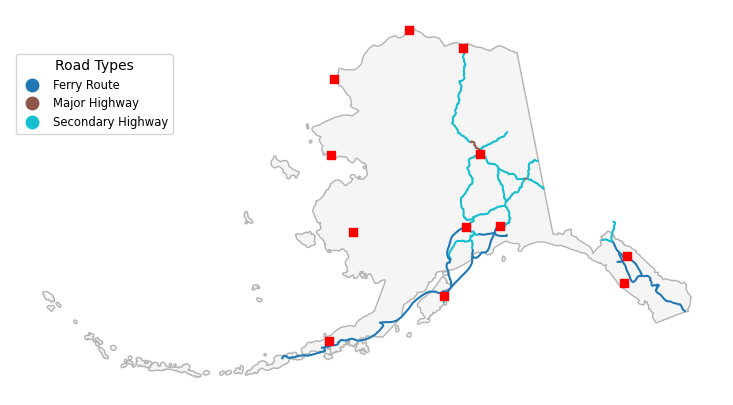

In [ ]:
fig, ax = plt.subplots(figsize=(11,5))
ax.axis('off')

alaska.plot(ax=ax, color='whitesmoke', edgecolor='0.7')

ak_complete_roads.plot(ax=ax, 
                       zorder=1,  # Specify layer plotting order
                       column='type', 
                       legend=True,
                       legend_kwds={'title': "Road Types", 
                                    'loc': 'upper left',
                                    'bbox_to_anchor':(0,0.9),
                                    'fontsize':'small'}
                                    )

ak_places.plot(ax=ax, 
               zorder=2,  # Specify layer plotting order
               color='red', 
               marker='s'  # Square marker
               )

<Axes: >

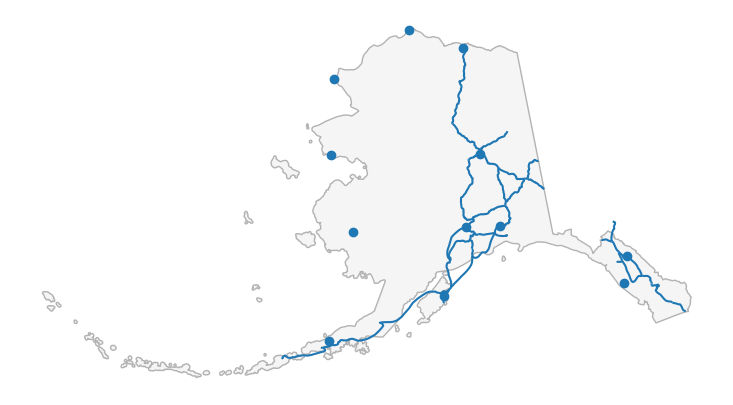

In [78]:
fig, ax = plt.subplots(figsize=(11,5))
ax.axis('off')

alaska.plot(ax=ax, color='whitesmoke', edgecolor='0.7')

ak_complete_roads.plot(ax=ax)

ak_places.plot(ax=ax)

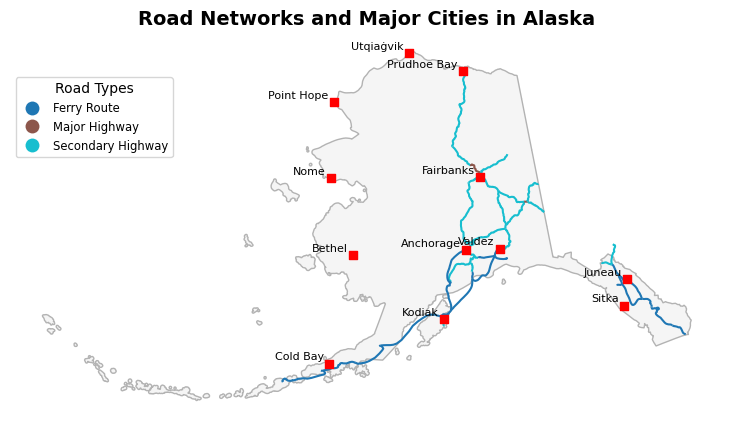

In [80]:
fig, ax = plt.subplots(figsize=(11,5))
ax.axis('off')

alaska.plot(ax=ax, color='whitesmoke', edgecolor='0.7')

ak_complete_roads.plot(ax=ax, 
                       zorder=1,  # Specify layer plotting order
                       column='type', 
                       legend=True,
                       legend_kwds={'title': "Road Types", 
                                    'loc': 'upper left',
                                    'bbox_to_anchor':(0,0.9),
                                    'fontsize':'small'}
                                    )

ak_places.plot(ax=ax, 
               zorder=2,  # Specify layer plotting order
               color='red', 
               marker='s'  # Square marker
               )

# Add city names as text annotations
for x, y, name in zip(ak_places.geometry.x, ak_places.geometry.y, ak_places['name']):
    ax.text(x-30000, y+20000, name, fontsize=8, ha='right')

ax.set_title("Road Networks and Major Cities in Alaska", fontsize=14, fontweight='bold')

plt.show()

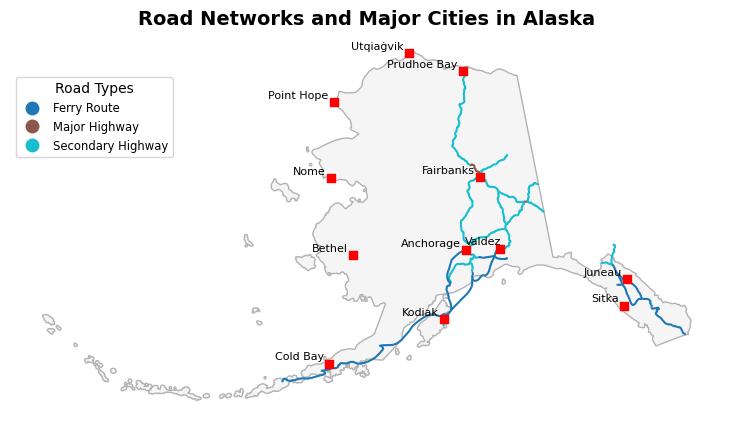

In [89]:
fig, ax = plt.subplots(figsize=(11,5))
ax.axis('off')

alaska.plot(ax=ax, color='whitesmoke', edgecolor='0.7')

ak_complete_roads.plot(ax=ax, 
                       zorder=1,  # Specify layer plotting order
                       column='type', 
                       legend=True,
                       legend_kwds={'title': "Road Types", 
                                    'loc': 'upper left',
                                    'bbox_to_anchor':(0,0.9),
                                    'fontsize':'small'}
                                    )

ak_places.plot(ax=ax, 
               zorder=2,  # Specify layer plotting order
               color='red', 
               marker='s'  # Square marker
               )

# Add city names as text annotations
for x, y, name in zip(ak_places.geometry.x, ak_places.geometry.y, ak_places['name']):
    if name == 'Valdez':
        ax.text(x+10000, y+20000, name, fontsize=8, ha='right')
    else:
        ax.text(x-30000, y+20000, name, fontsize=8, ha='right')


ax.set_title("Road Networks and Major Cities in Alaska", fontsize=14, fontweight='bold')

plt.show()